# Exploratory Data Analysis of Top 250 movies on Internet Movie Database (IMDb)

### Made by: Kevin Trejos Vargas and Rene Quesada

## **Univariate Analysis**



In [2]:
# prompt: give the code to read the IMDB Top 250 Movies.csv and parse with numpy

import numpy as np
import pandas as pd

# Read the IMDB Top 250 Movies.csv file into a Pandas DataFrame
df = pd.read_csv('/content/sample_data/IMDB Top 250 Movies.csv')
print(df.count)
# Parse a copy of the DataFrame with NumPy
df_with_arrays= df[:]

# Splitting the 'genre' column by comma and expanding it into multiple columns
genres = df['genre'].str.split(',', expand=True)

# Adding a prefix to each column
genres = genres.add_prefix('genre_')

# Splitting the 'genre' column by comma and expanding it into multiple columns
writers = df['writers'].str.split(',', expand=True)

# Adding a prefix to each column
writers = writers.add_prefix('writers_')

# Splitting the 'genre' column by comma and expanding it into multiple columns
casts = df['casts'].str.split(',', expand=True)

# Adding a prefix to each column
casts = casts.add_prefix('casts_')

# Splitting the 'genre' column by comma and expanding it into multiple columns
directors = df['directors'].str.split(',', expand=True)

# Adding a prefix to each column
directors = directors.add_prefix('directors_')

# Concatenating the new genre columns with the original DataFrame
df_with_arrays = pd.concat([df_with_arrays, genres], axis=1)

# Concatenating the new genre columns with the original DataFrame
df_with_arrays = pd.concat([df_with_arrays, writers], axis=1)

# Concatenating the new genre columns with the original DataFrame
df_with_arrays = pd.concat([df_with_arrays, casts], axis=1)

# Concatenating the new genre columns with the original DataFrame
df_with_arrays = pd.concat([df_with_arrays, directors], axis=1)

# Print the data
#print(df.head())
print(df_with_arrays.head())


<bound method DataFrame.count of      rank                      name  year  rating                       genre  \
0       1  The Shawshank Redemption  1994     9.3                       Drama   
1       2             The Godfather  1972     9.2                 Crime,Drama   
2       3           The Dark Knight  2008     9.0          Action,Crime,Drama   
3       4     The Godfather Part II  1974     9.0                 Crime,Drama   
4       5              12 Angry Men  1957     9.0                 Crime,Drama   
..    ...                       ...   ...     ...                         ...   
245   246                  The Help  2011     8.1                       Drama   
246   247               Dersu Uzala  1975     8.2   Adventure,Biography,Drama   
247   248                   Aladdin  1992     8.0  Animation,Adventure,Comedy   
248   249                    Gandhi  1982     8.0     Biography,Drama,History   
249   250        Dances with Wolves  1990     8.0     Adventure,Drama,Wester

Unique values for 'name':
['The Shawshank Redemption' 'The Godfather' 'The Dark Knight'
 'The Godfather Part II' '12 Angry Men' "Schindler's List"
 'The Lord of the Rings: The Return of the King' 'Pulp Fiction'
 'The Lord of the Rings: The Fellowship of the Ring'
 'The Good, the Bad and the Ugly' 'Forrest Gump' 'Fight Club'
 'The Lord of the Rings: The Two Towers' 'Inception'
 'Star Wars: Episode V - The Empire Strikes Back' 'The Matrix'
 'Goodfellas' "One Flew Over the Cuckoo's Nest" 'Se7en' 'Seven Samurai'
 "It's a Wonderful Life" 'The Silence of the Lambs' 'City of God'
 'Saving Private Ryan' 'Interstellar' 'Life Is Beautiful' 'The Green Mile'
 'Star Wars: Episode IV - A New Hope' 'Terminator 2: Judgment Day'
 'Back to the Future' 'Spirited Away' 'The Pianist' 'Psycho' 'Parasite'
 'Léon: The Professional' 'The Lion King' 'Gladiator' 'American History X'
 'The Departed' 'The Usual Suspects' 'The Prestige' 'Whiplash'
 'Casablanca' 'Grave of the Fireflies' 'Harakiri' 'The Intouchables'

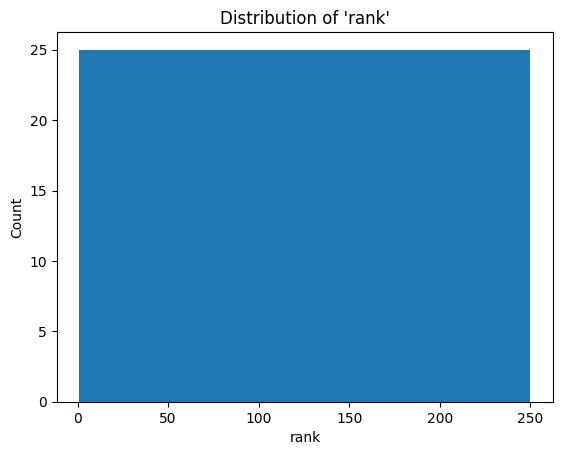

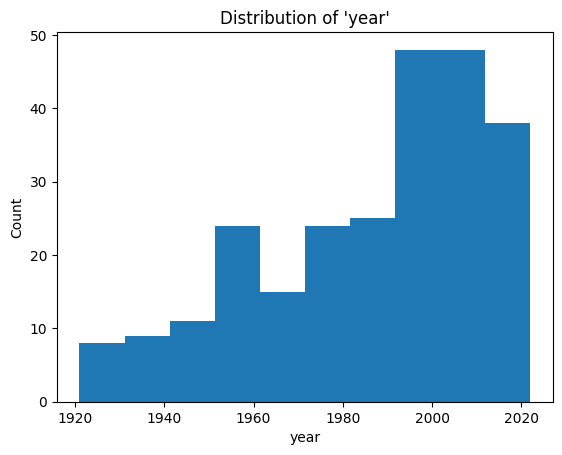

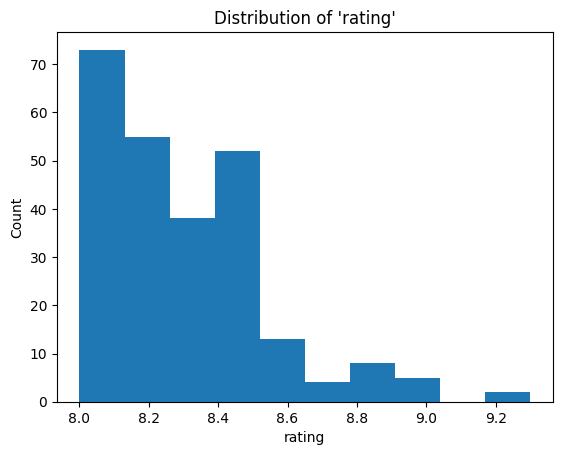

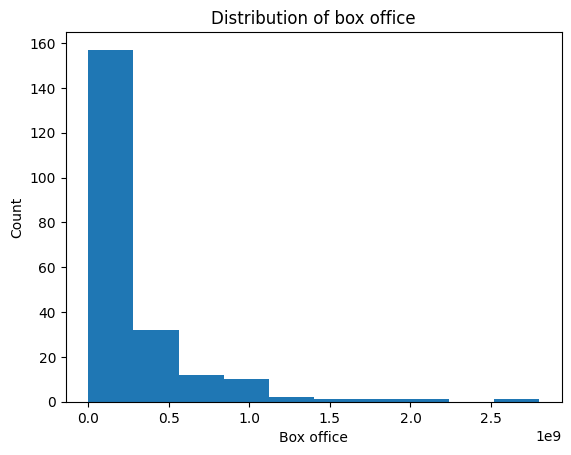

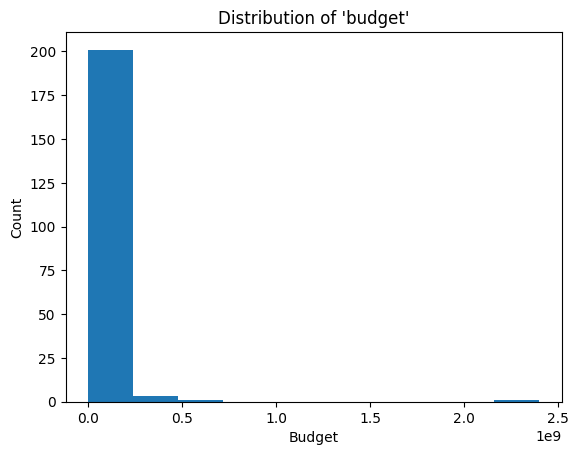

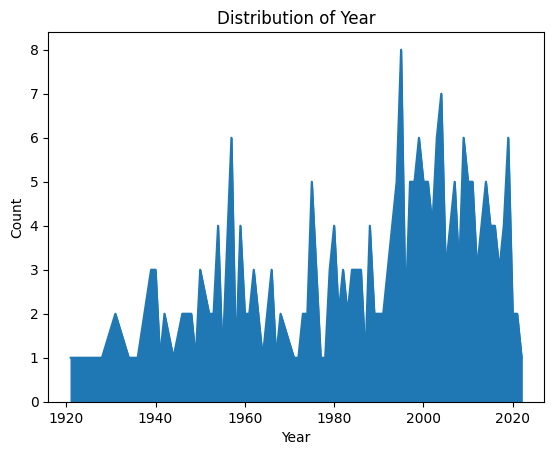

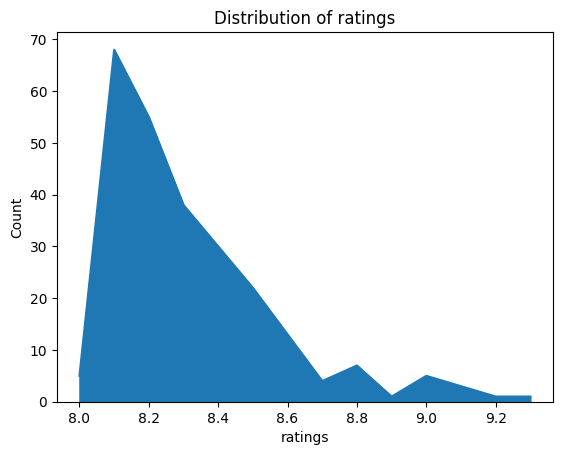

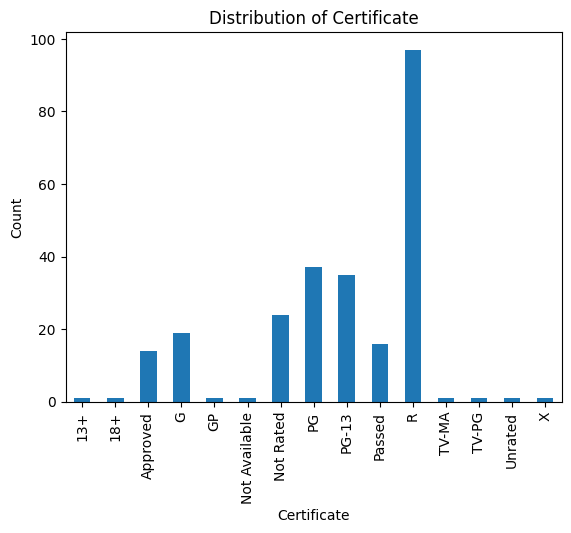

In [3]:
# prompt: can you give me a small uni variable analisis for df_with_array

box_office =pd.to_numeric( df_with_arrays['box_office'],errors="coerce", downcast=None)
budget =pd.to_numeric( df_with_arrays['budget'],errors="coerce", downcast=None)

# Get descriptive statistics for numerical columns
df_with_arrays.describe()

# Get the unique values for categorical columns
for col in df_with_arrays.select_dtypes(include='object'):
  print(f"Unique values for '{col}':")
  print(df_with_arrays[col].unique())

# Get the frequency distribution for categorical columns
for col in df_with_arrays.select_dtypes(include='object'):
  print(f"Frequency distribution for '{col}':")
  print(df_with_arrays[col].value_counts())


# Visualize the distribution of numerical columns using histograms
import matplotlib.pyplot as plt
for col in df_with_arrays.select_dtypes(include='number'):
  plt.hist(df_with_arrays[col])
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.title(f"Distribution of '{col}'")
  plt.show()

#box office
plt.hist(box_office)
plt.xlabel("Box office")
plt.ylabel("Count")
plt.title(f"Distribution of box office")
plt.show()

#budget
plt.hist(budget)
plt.xlabel("Budget")
plt.ylabel("Count")
plt.title(f"Distribution of 'budget'")
plt.show()

df_with_arrays['year'].value_counts().sort_index().plot.area()
plt.xlabel("Year")
plt.ylabel("Count")
plt.title(f"Distribution of Year")
plt.show()

df_with_arrays['rating'].value_counts().sort_index().plot.area()
plt.xlabel("ratings")
plt.ylabel("Count")
plt.title(f"Distribution of ratings")
plt.show()

df_with_arrays['certificate'].value_counts().sort_index().plot.bar()
plt.xlabel("Certificate")
plt.ylabel("Count")
plt.title(f"Distribution of Certificate")
plt.show()


In [4]:
# prompt: give the code to read the IMDB Top 250 Movies.csv and parse with numpy

import numpy as np
import pandas as pd

# Read the IMDB Top 250 Movies.csv file into a Pandas DataFrame
df = pd.read_csv('/content/sample_data/IMDB Top 250 Movies.csv')

# Parse a copy of the DataFrame with NumPy
new_df = df[:]

# Create array with the genre column
new_df.genre = df.genre.str.split(',')

#explode the genre, this will create a row for each different genre
new_df = new_df.explode(['genre'])

# Print the data
#print(df.head())
print(new_df.head())


   rank                      name  year  rating   genre certificate run_time  \
0     1  The Shawshank Redemption  1994     9.3   Drama           R   2h 22m   
1     2             The Godfather  1972     9.2   Crime           R   2h 55m   
1     2             The Godfather  1972     9.2   Drama           R   2h 55m   
2     3           The Dark Knight  2008     9.0  Action       PG-13   2h 32m   
2     3           The Dark Knight  2008     9.0   Crime       PG-13   2h 32m   

                                             tagline     budget  box_office  \
0  Fear can hold you prisoner. Hope can set you f...   25000000    28884504   
1                         An offer you can't refuse.    6000000   250341816   
1                         An offer you can't refuse.    6000000   250341816   
2                                    Why So Serious?  185000000  1006234167   
2                                    Why So Serious?  185000000  1006234167   

                                            

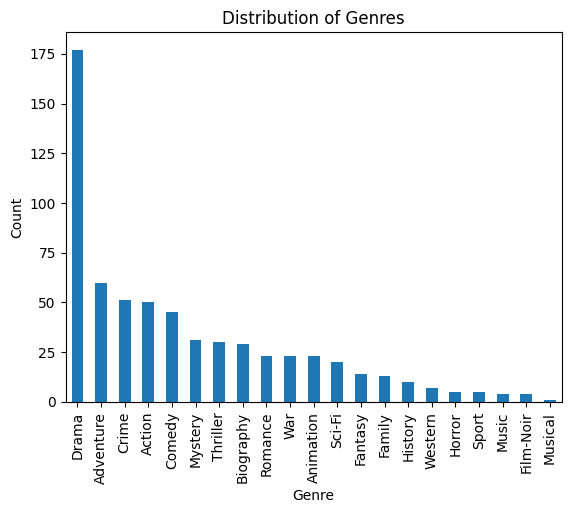

Genre: Drama, Count: 177
Genre: Crime, Count: 60
Genre: Action, Count: 51
Genre: Biography, Count: 50
Genre: History, Count: 45
Genre: Adventure, Count: 31
Genre: Western, Count: 30
Genre: Romance, Count: 29
Genre: Sci-Fi, Count: 23
Genre: Fantasy, Count: 23
Genre: Mystery, Count: 23
Genre: Family, Count: 20
Genre: Thriller, Count: 14
Genre: War, Count: 13
Genre: Comedy, Count: 10
Genre: Animation, Count: 7
Genre: Music, Count: 5
Genre: Horror, Count: 5
Genre: Film-Noir, Count: 4
Genre: Musical, Count: 4
Genre: Sport, Count: 1
21


In [5]:
# Getting all unique genre
unique_genres = new_df['genre'].unique()
# get the count
genre_counts = new_df['genre'].value_counts()

new_df['genre'].value_counts().plot.bar()
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title(f"Distribution of Genres")
plt.show()

# Print the unique genres and their counts
for genre, count in zip(unique_genres, genre_counts):
  print(f"Genre: {genre}, Count: {count}")

print(len(unique_genres))

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the IMDB Top 250 Movies.csv file into a Pandas DataFrame
df = pd.read_csv('/content/sample_data/IMDB Top 250 Movies.csv')

column_names = df.columns.tolist()

# Use a dictionary as the data structure
ds_movies = {}
for index, row in df.iterrows():
  ds_movies[row["rank"]] = {}
  for column in column_names:
    if column not in ["genre", "casts", "directors", "writers"]:
      ds_movies[row["rank"]][column] = row[column]
    else:
      ds_movies[row["rank"]][column] = row[column].title().split(",")

for movie in ds_movies.items():
  print(movie)

(1, {'rank': 1, 'name': 'The Shawshank Redemption', 'year': 1994, 'rating': 9.3, 'genre': ['Drama'], 'certificate': 'R', 'run_time': '2h 22m', 'tagline': 'Fear can hold you prisoner. Hope can set you free.', 'budget': '25000000', 'box_office': '28884504', 'casts': ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler', 'Clancy Brown', 'Gil Bellows', 'Mark Rolston', 'James Whitmore', 'Jeffrey Demunn', 'Larry Brandenburg', 'Neil Giuntoli', 'Brian Libby', 'David Proval', 'Joseph Ragno', 'Jude Ciccolella', 'Paul Mccrane', 'Renee Blaine', 'Scott Mann'], 'directors': ['Frank Darabont'], 'writers': ['Stephen King', 'Frank Darabont']})
(2, {'rank': 2, 'name': 'The Godfather', 'year': 1972, 'rating': 9.2, 'genre': ['Crime', 'Drama'], 'certificate': 'R', 'run_time': '2h 55m', 'tagline': "An offer you can't refuse.", 'budget': '6000000', 'box_office': '250341816', 'casts': ['Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton', 'Richard S. Castellano', 'Robert Duvall', 'Sterling Ha

Which genres have the most movies?

Based on the plot, Drama, Adventure, and Comedy are the top three genres with highest number of movies.

Drama: 177
Crime: 51
Action: 50
Biography: 29
History: 10
Adventure: 60
Western: 7
Romance: 23
Sci-Fi: 20
Fantasy: 14
Mystery: 31
Family: 13
Thriller: 30
War: 23
Comedy: 45
Animation: 23
Music: 4
Horror: 5
Film-Noir: 4
Musical: 1
Sport: 5


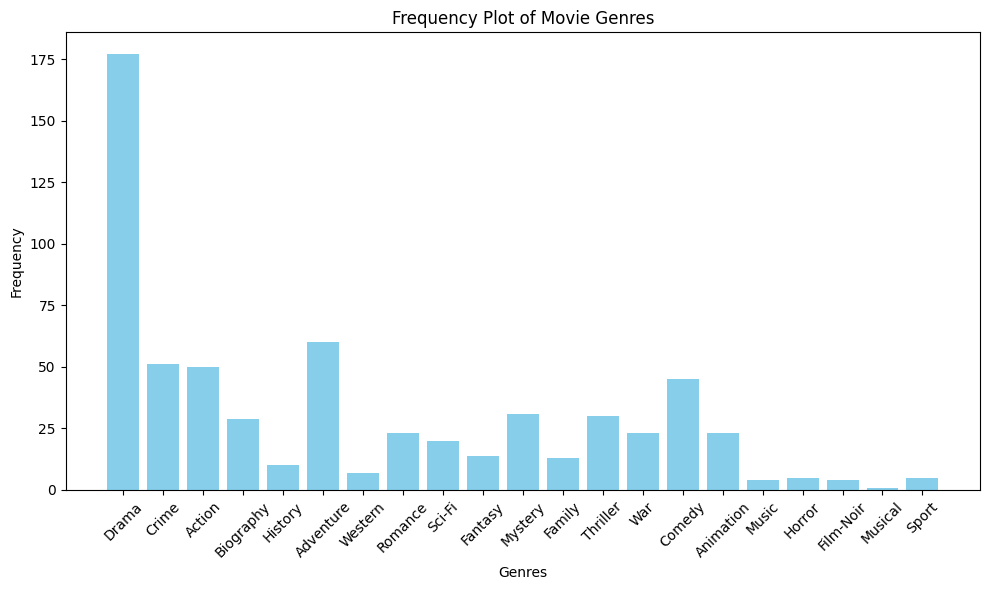

In [7]:
# Count genre occurrences
genre_count = {}
for key in ds_movies.keys():
    for genre in ds_movies[key]['genre']:
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1

# Plotting
for key in genre_count.keys():
  print(f"{key}: {genre_count[key]}")
genres = list(genre_count.keys())
counts = list(genre_count.values())

plt.figure(figsize=(10, 6))
plt.bar(genres, counts, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Movie Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mention the 3 genres with the best average rating

In [8]:
genres = set()

# Get the different genres
for movie in ds_movies.values():
  genres.update(movie['genre'])

# Create a DS with the genres matching their ratings
genre_ratings = {}
for genre in genres:
  genre_ratings[genre] = {}
  genre_ratings[genre]["ratings"] = []
  for movie in ds_movies.values():
    if genre in movie["genre"]:
      genre_ratings[genre]["ratings"].append(movie["rating"])
  genre_ratings[genre]["avg_rating"] = round(
      sum(genre_ratings[genre]["ratings"]) / \
      len(genre_ratings[genre]["ratings"]), 4
  )

# Get the top three genres
sorted_genres = sorted(
    genre_ratings.items(),
    key=lambda x: x[1]['avg_rating'],
    reverse=True
)

# Record the top three genres with the highest average ratings
top_three_genres = sorted_genres[:3]

print("\nTop Three Genres with Highest Average Ratings:")
for genre, info in top_three_genres:
    print(f"    {genre}: {info['avg_rating']}")




Top Three Genres with Highest Average Ratings:
    Music: 8.4
    Crime: 8.3608
    Sci-Fi: 8.36


## **Mutivariate Analysis**

Mention the best 10 movies according to the rating

In [9]:
# Sort the movies by their rating
sorted_movies = sorted(
    ds_movies.items(),
    key=lambda x: x[1]['rating'],
    reverse=True
)

# Record the top ten movies with the highest ratings
top_ten_movies = sorted_movies[:10]

print("Top Ten Movies with Highest Ratings:")
for element, movie in top_ten_movies:
    print(f"    {movie['name']}: {movie['rating']}")

Top Ten Movies with Highest Ratings:
    The Shawshank Redemption: 9.3
    The Godfather: 9.2
    The Dark Knight: 9.0
    The Godfather Part II: 9.0
    12 Angry Men: 9.0
    Schindler's List: 9.0
    The Lord of the Rings: The Return of the King: 9.0
    Pulp Fiction: 8.9
    The Lord of the Rings: The Fellowship of the Ring: 8.8
    The Good, the Bad and the Ugly: 8.8


Mention the 10 movies that generated the most profit, along with the profit of each one

Top Ten Movies Sorted by Profit:
    Avengers: Endgame: USD 2443439100.0
    Avengers: Infinity War: USD 1731415039.0
    Spider-Man: No Way Home: USD 1721847111.0
    Top Gun: Maverick: USD 1318732821.0
    Harry Potter and the Deathly Hallows: Part 2: USD 1217359942.0
    The Lord of the Rings: The Return of the King: USD 1052457748.0
    Jurassic Park: USD 1046802321.0
    Joker: USD 1019458282.0
    The Lion King: USD 923511805.0
    Toy Story 3: USD 867316101.0


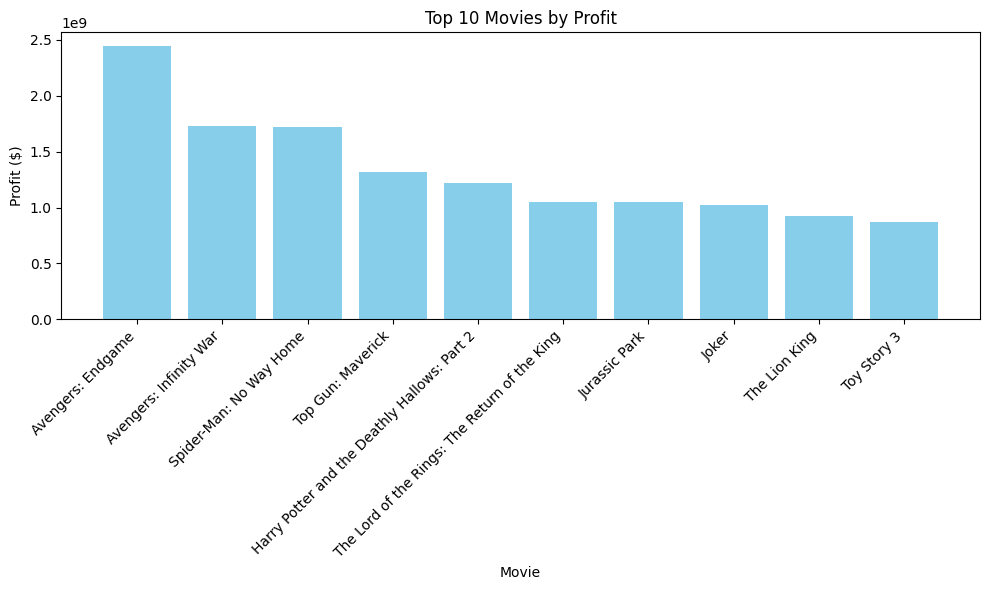

In [10]:
# Calculate profit for each movie and add it to the dictionary
for key in ds_movies:
  try:
    ds_movies[key]['profit'] = \
      float(ds_movies[key]['box_office'].replace("$","")) - \
      float(ds_movies[key]['budget'].replace("$",""))
  except:
    ds_movies[key]['profit'] = 0

# Sort movies based on profit in descending order
sorted_movies_by_profit = sorted(
    ds_movies.items(),
    key=lambda x: x[1]['profit'],
    reverse=True
)

# Print sorted movies
print("Top Ten Movies Sorted by Profit:")
counter = 0
for movie in sorted_movies_by_profit:
  if (counter < 10):
    counter += 1
    if movie[1]['profit'] >= 0:
      print(f"    {movie[1]['name']}: USD {movie[1]['profit']}")
    else:
      print(f"    {movie[1]['name']}: - USD {movie[1]['profit']*-1}")


# Extract movie names and profits
top_10_movies = sorted_movies_by_profit[:10]
movie_names = [movie[1]['name'] for movie in top_10_movies]
profits = [movie[1]['profit'] for movie in top_10_movies]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(movie_names, profits, color='skyblue')
plt.xlabel('Movie')
plt.ylabel('Profit ($)')
plt.title('Top 10 Movies by Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

Which genres invest the most in making films?


Top Ten Genres with Highest Average Budgets:
    Animation: USD 241923529.4118
    Action: USD 142507068.1818
    Adventure: USD 117160367.4107
    Sci-Fi: USD 70900000.0
    Comedy: USD 53356900.6053
    Fantasy: USD 48187428.8462
    Family: USD 45300875.0
    Drama: USD 35243085.0284
    Biography: USD 30273913.0435
    Crime: USD 28261839.5714


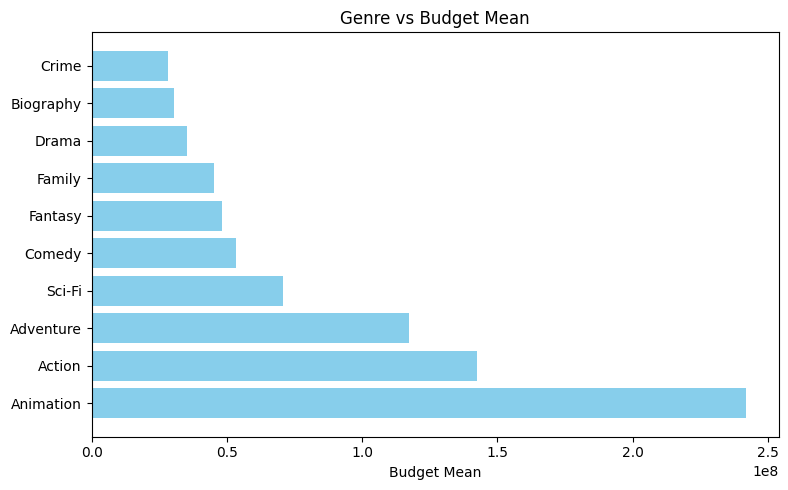

In [11]:
# Create a DS with the genres matching their budgets
genre_budgets = {}
for genre in genres:
  genre_budgets[genre] = {}
  genre_budgets[genre]["budgets"] = []
  for movie in ds_movies.values():
    if genre in movie["genre"]:
      try:
        genre_budgets[genre]["budgets"].append(float(movie["budget"]))
      except:
        pass # Record nothing if there is no data
  genre_budgets[genre]["avg_budget"] = round(
      sum(genre_budgets[genre]["budgets"]) / \
      len(genre_budgets[genre]["budgets"]), 4
  )

# Get the top three budgets
sorted_budgets = sorted(
    genre_budgets.items(),
    key=lambda x: x[1]['avg_budget'],
    reverse=True
)

# Record the top ten genres with the highest average budgets
top_ten_bugets = sorted_budgets[:10]
top_ten_budget_genre_names = [
    movie[0] for movie in top_ten_bugets
]
top_ten_budget_genre_budgets = [
    int(movie[1]['avg_budget']) for movie in top_ten_bugets
]

print("\nTop Ten Genres with Highest Average Budgets:")
for genre, info in top_ten_bugets:
    print(f"    {genre}: USD {info['avg_budget']}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.barh(top_ten_budget_genre_names, top_ten_budget_genre_budgets, color='skyblue')
plt.xlabel('Budget Mean')
plt.title('Genre vs Budget Mean')

plt.tight_layout()
plt.show()

In [12]:
# RUN THIS CODE ONLY ONCE, OTHERWISE RE-RUN THE WHOLE BOOK

# Converting runtime to a minutes equivalent
def convert_run_time(run_time):
    # Split the run_time string into hours and minutes
    if 'not available' == run_time.lower():
      hours = '0'
      minutes = '0m'
    else:
      if 'm' not in run_time:
        minutes = '0m'
        hours = run_time.replace('h', '')
      elif 'h' not in run_time:
        hours = '0'
        minutes = run_time.replace('m','')
      else:
        hours, minutes = run_time.split('h ')
    # Convert hours and minutes to integers and calculate total minutes
    total_minutes = int(hours) * 60 + int(minutes[:-1])
    return total_minutes

# Update run_time in ds_movies to numerical format in minutes
for movie in ds_movies.keys():
    ds_movies[movie]['run_time'] = \
      convert_run_time(ds_movies[movie]['run_time'])

Identify if there are one or several variables that contribute significantly to maximizing profit

As you can tell:
1. There are some certificates that seem to be more correlated to higher profits.
2. The earlier the movie, the lower the profit.
3. The higher the run time, the higher the profit. There seems to be a kind of trend, but it is not granted, since a lot of movies are bringing zero profit based on their run time.
4. The higher the box office, the higher the profit.
5. There is not enough data to conclude about the budget, however, it can be somehow tell that there is a bound line around USD 500 millions, at which the profit tends to grow when the budget grows, meaning that better sponsored movies tend to bring higher profit, and after it, the trend tends to become inverse, which means that at this point, more higher profits.

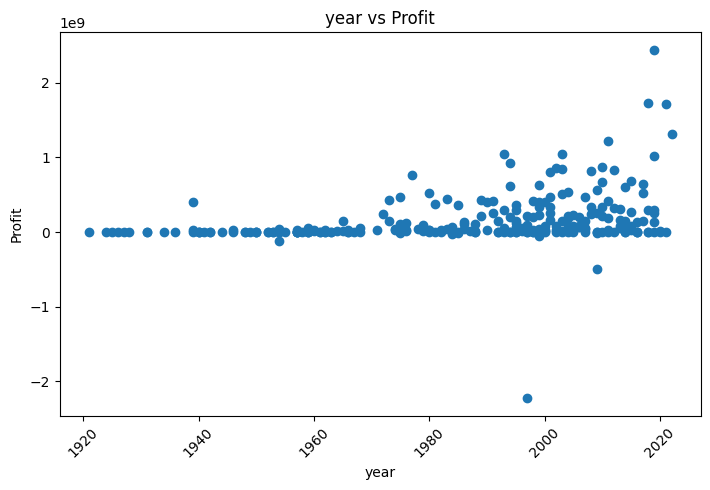

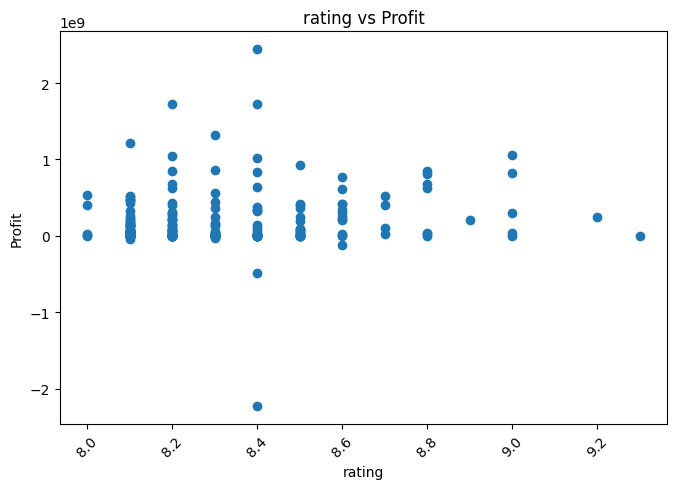

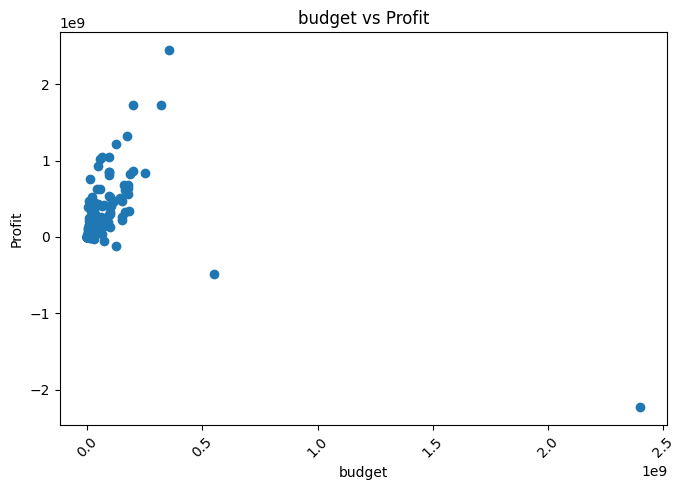

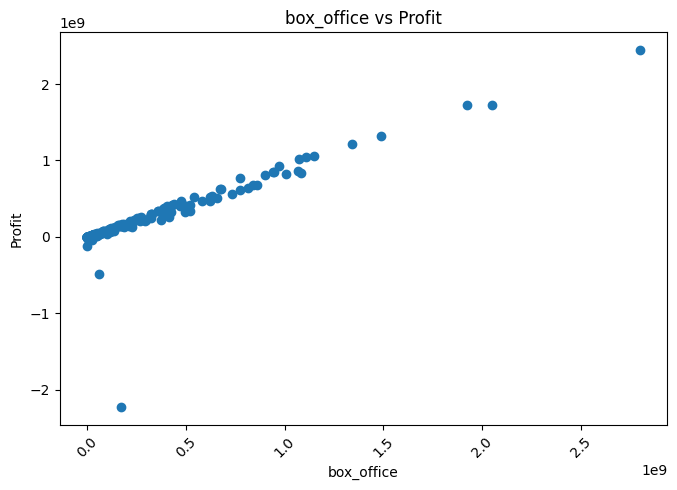

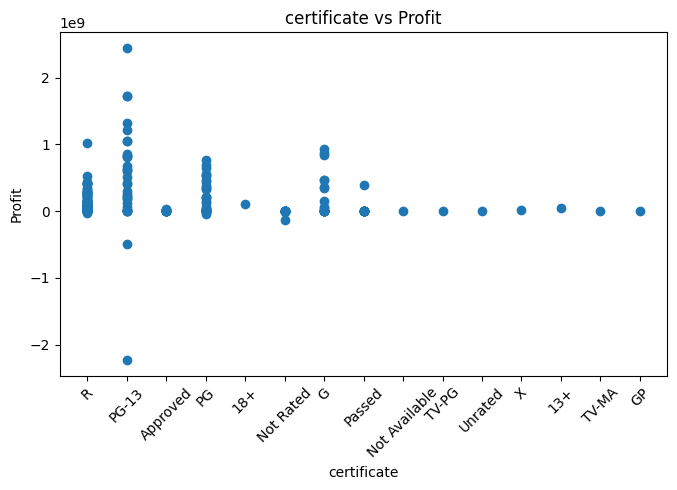

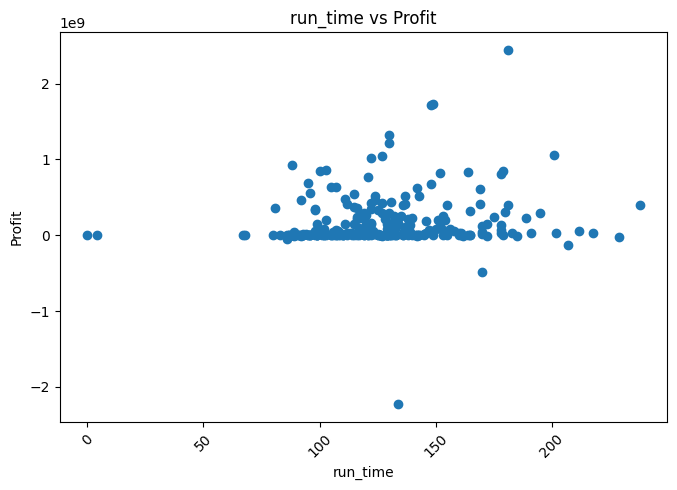

In [13]:
# Select features for plotting
features = [
    'year', 'rating',
    'budget', 'box_office',
    'certificate', 'run_time']

for i, feature in enumerate(features, 1):
    plt.figure(figsize=(40, 5))
    plt.subplot(1, len(features), i)
    feature_values = [
        movie_value.get(feature, None) \
        for movie_value in ds_movies.values()
    ]
    # Remove text values from the feature values
    if (feature in ["box_office", "budget"]):
      for value in range(len(feature_values)):
        try:
          feature_values[value] = float(feature_values[value])
        except:
          feature_values[value] = 0.0

    profit_values = [
        movie_value['profit'] for movie_value in ds_movies.values()
    ]
    plt.scatter(feature_values, profit_values)
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylabel('Profit')
    plt.title(f'{feature} vs Profit')
    plt.tight_layout()
    plt.show()

What are the 5 most successful directors in terms of rating and profit. Of the data that supports it.

Directors sorted by mean rating (highest to lowest):
Frank Darabont: 8.95
Francis Ford Coppola: 8.9
Peter Jackson: 8.8667
T.J. Gnanavel: 8.8
Lilly Wachowski: 8.7

Directors sorted by mean profit (highest to lowest):
Joe Russo: USD 2087427069.5
Anthony Russo: USD 2087427069.5
Jon Watts: USD 1721847111.0
Joseph Kosinski: USD 1318732821.0
David Yates: USD 1217359942.0


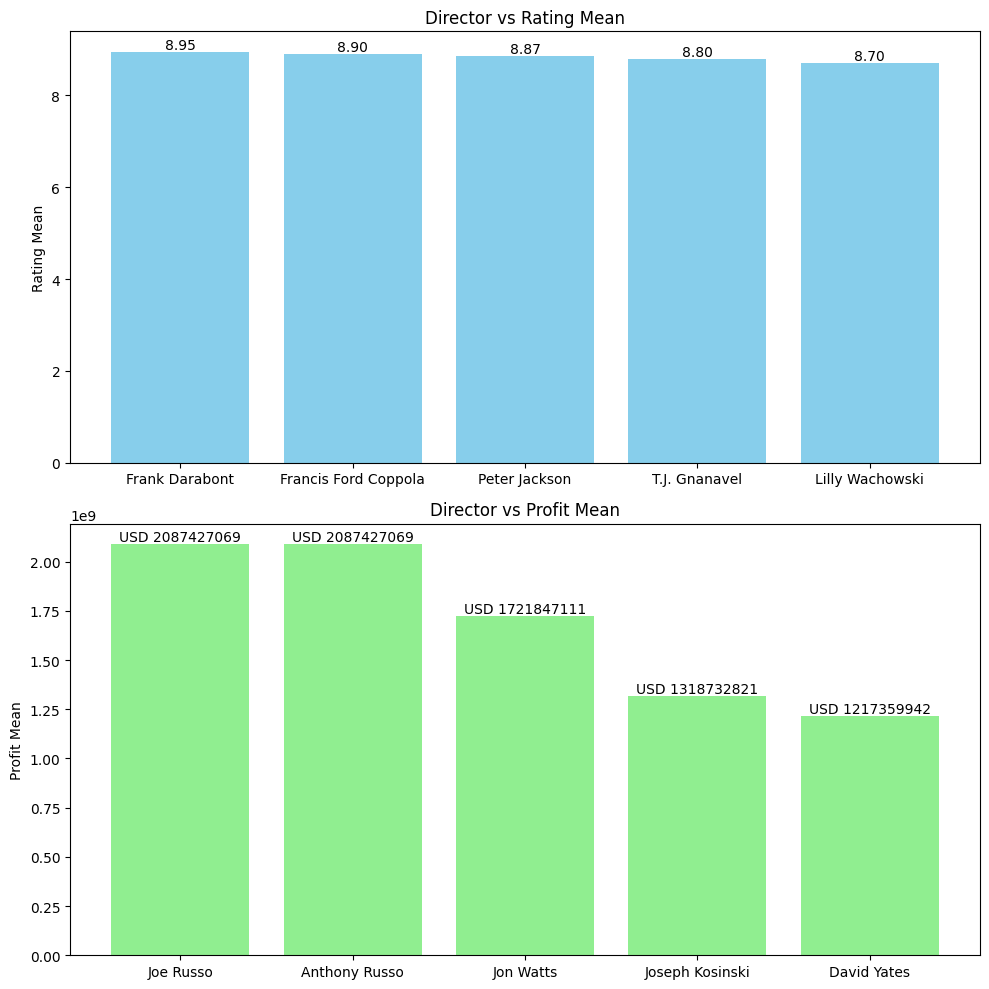

In [14]:
directors_dirty = set()

# Get the different actors
for movie in ds_movies.values():
  directors_dirty.update(movie['directors'])

# Get directors without their sub-role in the film
directors = {element.split('(')[0] for element in directors_dirty}

# Get the ratings and profits for each director
director_success = {}
for director in directors:
  director_success[director] = {}
  director_success[director]['ratings'] = []
  director_success[director]['profits'] = []
  for key in ds_movies.keys():
    if director in ds_movies[key]['directors']:
      director_success[director]['ratings'].append(
          float(ds_movies[key]['rating'])
      )
      director_success[director]['profits'].append(
          float(ds_movies[key]['profit'])
      )

  # Compute the mean of the ratings
  if (len(director_success[director]['ratings']) > 0):
    director_success[director]['rating_mean'] = \
      round(sum(director_success[director]['ratings']) / \
      len(director_success[director]['ratings']), 4)
  else:
    director_success[director]['rating_mean'] = 0

  # Compute the mean of the profits
  if (len(director_success[director]['profits']) > 0):
    director_success[director]['profit_mean'] = \
      round(sum(director_success[director]['profits']) / \
      len(director_success[director]['profits']), 4)
  else:
    director_success[director]['profit_mean'] = 0

# Sort directors by mean rating in descending order
sorted_directors_by_rating = sorted(
    director_success.items(),
    key=lambda x: x[1]['rating_mean'],
    reverse=True
)

print("Directors sorted by mean rating (highest to lowest):")
director_count = 0
for director, data in sorted_directors_by_rating:
    print(f"{director}: {data['rating_mean']}")
    director_count += 1
    if director_count > 4:
      break

# Sort directors by mean profit in descending order
sorted_directors_by_profit = sorted(
    director_success.items(),
    key=lambda x: x[1]['profit_mean'],
    reverse=True
)

print("\nDirectors sorted by mean profit (highest to lowest):")
director_count = 0
for director, data in sorted_directors_by_profit:
    print(f"{director}: USD {data['profit_mean']}")
    director_count += 1
    if director_count > 4:
      break

# Plotting the results
top5_directors_by_rating = sorted_directors_by_rating[:5]
top5r_director_names = [
    movie[0] for movie in top5_directors_by_rating
]
top5r_director_ratings = [
    movie[1]['rating_mean'] for movie in top5_directors_by_rating
]

top5_directors_by_profit = sorted_directors_by_profit[:5]
top5p_director_names = [
    movie[0] for movie in top5_directors_by_profit
]
top5p_director_profits = [
    int(movie[1]['profit_mean']) for movie in top5_directors_by_profit
]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Rating Mean subplot
ax1.bar(top5r_director_names, top5r_director_ratings, color='skyblue')
for i in range(len(top5_directors_by_rating)):
    ax1.text(
        i, top5r_director_ratings[i],
        f"{top5r_director_ratings[i]:.2f}",
        ha='center', va='bottom'
    )
ax1.set_ylabel('Rating Mean')
ax1.set_title('Director vs Rating Mean')

# Profit Mean subplot
ax2.bar(
    top5p_director_names,
    top5p_director_profits,
    color='lightgreen'
)
for i in range(len(top5p_director_names)):
    ax2.text(
        i, top5p_director_profits[i],
        f"USD {top5p_director_profits[i]}",
        ha='center', va='bottom'
    )
ax2.set_ylabel('Profit Mean')
ax2.set_title('Director vs Profit Mean')

plt.tight_layout()

# Display the plot
plt.show()

Who are the 5 most successful actors in terms of rating and earnings. Of the data that supports it.

{'rank': 78, 'name': 'Avengers: Endgame', 'year': 2019, 'rating': 8.4, 'genre': ['Action', 'Adventure', 'Drama'], 'certificate': 'PG-13', 'run_time': 181, 'tagline': 'Avenge the fallen.', 'budget': '356000000', 'box_office': '2799439100', 'casts': ['Robert Downey Jr.', 'Chris Evans', 'Mark Ruffalo', 'Chris Hemsworth', 'Scarlett Johansson', 'Jeremy Renner', 'Don Cheadle', 'Paul Rudd', 'Benedict Cumberbatch', 'Chadwick Boseman', 'Brie Larson', 'Tom Holland', 'Karen Gillan', 'Zoe Saldana', 'Evangeline Lilly', 'Tessa Thompson', 'Rene Russo', 'Elizabeth Olsen'], 'directors': ['Anthony Russo', 'Joe Russo'], 'writers': ['Christopher Markus', 'Stephen Mcfeely', 'Stan Lee'], 'profit': 2443439100.0}
Actors sorted by mean rating (highest to lowest):
Bob Gunton: 9.3 - [9.3]
Renee Blaine: 9.3 - [9.3]
Scott Mann: 9.3 - [9.3]
James Whitmore: 9.3 - [9.3]
David Proval: 9.3 - [9.3]
\Actors sorted by mean profit (highest to lowest):
Jeremy Renner: USD 2443439100.0 - [2443439100.0]
Paul Rudd: USD 24434391

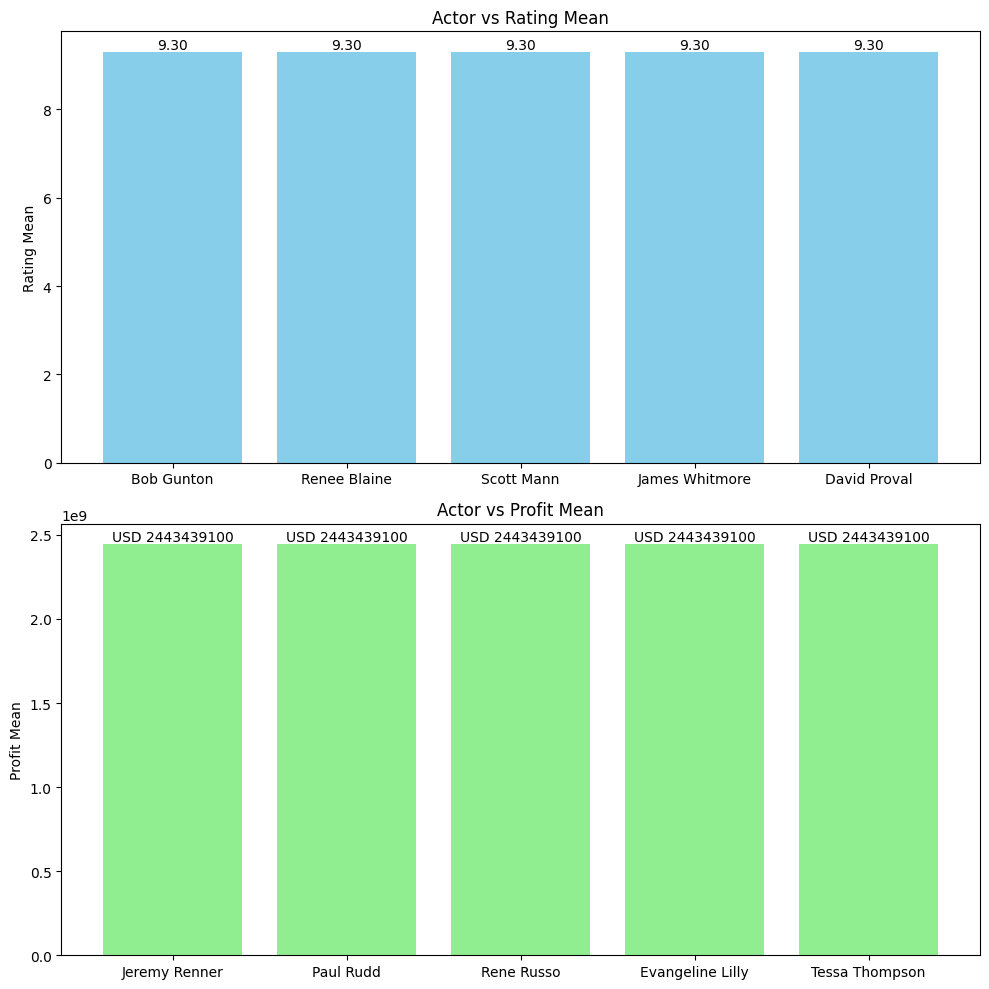

In [15]:
actors = set()

# Get the different actors and actress
for movie in ds_movies.values():
  actors.update(movie['casts'])

# Get the ratings and profits for each actor or actress
actor_success = {}
for actor in actors:
  actor_success[actor] = {}
  actor_success[actor]['ratings'] = []
  actor_success[actor]['profits'] = []
  for key in ds_movies.keys():
    if actor in ds_movies[key]['casts']:
      actor_success[actor]['ratings'].append(
          float(ds_movies[key]['rating'])
      )
      actor_success[actor]['profits'].append(
          float(ds_movies[key]['profit'])
      )
      if actor.lower() == 'paul rudd':
        print(ds_movies[key])

  # Compute the mean of the ratings
  if (len(actor_success[actor]['ratings']) > 0):
    actor_success[actor]['rating_mean'] = \
      round(sum(actor_success[actor]['ratings']) / \
      len(actor_success[actor]['ratings']), 4)
  else:
    actor_success[actor]['rating_mean'] = 0

  # Compute the mean of the profits
  if (len(actor_success[actor]['profits']) > 0):
    actor_success[actor]['profit_mean'] = \
      round(sum(actor_success[actor]['profits']) / \
      len(actor_success[actor]['profits']), 4)
  else:
    actor_success[actor]['profit_mean'] = 0

# Sort actors by mean rating in descending order
sorted_actors_by_rating = sorted(
    actor_success.items(),
    key=lambda x: x[1]['rating_mean'],
    reverse=True
)

print("Actors sorted by mean rating (highest to lowest):")
actor_count = 0
for actor, data in sorted_actors_by_rating:
    print(f"{actor}: {data['rating_mean']} - {data['ratings']}")
    actor_count += 1
    if actor_count > 4:
      break

# Sort actors by mean profit in descending order
sorted_actors_by_profit = sorted(
    actor_success.items(),
    key=lambda x: x[1]['profit_mean'],
    reverse=True
)

print("\Actors sorted by mean profit (highest to lowest):")
actor_count = 0
for actor, data in sorted_actors_by_profit:
    print(f"{actor}: USD {data['profit_mean']} - {data['profits']}")
    actor_count += 1
    if actor_count > 4:
      break

# Plotting the results
top5_actors_by_rating = sorted_actors_by_rating[:5]
top5r_actor_names = [
    movie[0] for movie in top5_actors_by_rating
]
top5r_actor_ratings = [
    movie[1]['rating_mean'] for movie in top5_actors_by_rating
]

top5_actors_by_profit = sorted_actors_by_profit[:5]
top5p_actor_names = [
    movie[0] for movie in top5_actors_by_profit
]
top5p_actor_profits = [
    int(movie[1]['profit_mean']) for movie in top5_actors_by_profit
]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Rating Mean subplot
ax1.bar(top5r_actor_names, top5r_actor_ratings, color='skyblue')
for i in range(len(top5_actors_by_rating)):
    ax1.text(
        i, top5r_actor_ratings[i],
        f"{top5r_actor_ratings[i]:.2f}",
        ha='center', va='bottom'
    )
ax1.set_ylabel('Rating Mean')
ax1.set_title('Actor vs Rating Mean')

# Profit Mean subplot
ax2.bar(top5p_actor_names, top5p_actor_profits, color='lightgreen')
for i in range(len(top5p_actor_names)):
    ax2.text(
        i, top5p_actor_profits[i],
        f"USD {top5p_actor_profits[i]}",
        ha='center', va='bottom'
    )
ax2.set_ylabel('Profit Mean')
ax2.set_title('Actor vs Profit Mean')

plt.tight_layout()

# Display the plot
plt.show()

Who are the top 3 writers according to the number of films in which they participate.

In [16]:
writers = set()

# Get the different actors and actress
for movie in ds_movies.values():
  writers.update(movie['writers'])

# Count the number of films for every writer
writers_films_number = {}
for writer in writers:
  writers_films_number[writer] = 0
  for key in ds_movies.keys():
    if writer in ds_movies[key]['writers']:
      writers_films_number[writer] += 1

# Sort writers by number of films in descending order
sorted_writers_by_number_of_films = sorted(
    writers_films_number.items(),
    key=lambda x: x[1],
    reverse=True
)

print("Top 3 writers sorted by number of films (highest to lowest):")
writers_count = 0
for writer, data in sorted_writers_by_number_of_films:
    print(f"{writer}: {data}")
    writers_count += 1
    if (writers_count > 2):
      break


Top 3 writers sorted by number of films (highest to lowest):
Christopher Nolan: 7
Stanley Kubrick: 7
Akira Kurosawa: 6


Explain the relationship/distribution of certificates between different genres.

Given the heatmap, some genres rise up higher than others, those are:

1.   **Mystery**: Most of these movies are Rated, which means that the movie is allowed only for people over 17.
2.   **Thriller**: Most of these movies are Rated, which means that the movie is allowed only for people over 17.
3.   **Biography**: Most of these movies are Rated, which means that the movie is allowed only for people over 17. But there are some of them emerging to be G, PG, or PG-13. Which means that these movies start trending to younger audiences.
4.   **Adventure**: Most of these movies are G, PG, or PG-13. Which means that these movies tend to be more tilted towards the younghest in the room.
5.   **Comedy**: These are movies mixed between multiple categories, but their trend towards younger people is clear.
6.   **Drama**: These movies are heavily tilted towards R, which means that most of these movies are only for people over 17.
7.   **Action**: These movies are equilibrated between PG, PG-13, and R, which means there is a wide variety of movie types in this category.
8.   **Animation**: Most of these movies are G or PG, which means that they are heavily tilted towards the younger people in the room.
9.   **Crime**: These movies are heavily tilted towards R, which means that most of them are designed for people over 17.

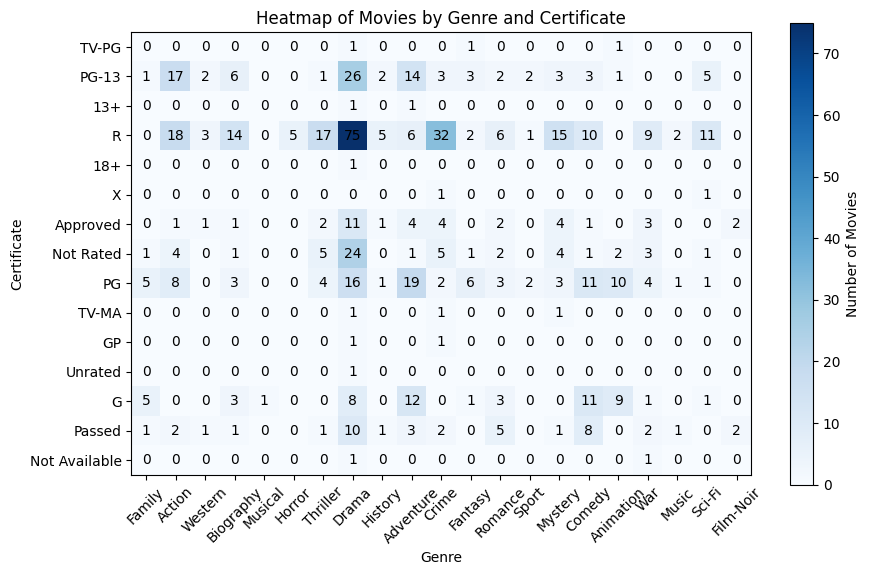

In [17]:
# Extract unique genres and certificates
genres = set(
    genre for movie in ds_movies.keys() \
    for genre in ds_movies[movie]['genre']
)
certificates = set(
    movie[1]['certificate'] for movie in ds_movies.items()
)

# Create a matrix to store the counts of movies
# for each combination of genre and certificate
matrix = np.zeros((len(certificates), len(genres)))

# Populate the matrix with counts
for i, certificate in enumerate(certificates):
    for j, genre in enumerate(genres):
        count = sum(
            1 for movie in ds_movies.items() \
            if movie[1]['certificate'] == certificate \
            and genre in movie[1]['genre']
        )
        matrix[i, j] = count

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(matrix, cmap='Blues', interpolation='nearest')

# Add number annotations to each cell
for i in range(len(certificates)):
    for j in range(len(genres)):
        plt.text(
            j, i, str(int(matrix[i, j])),
            ha='center', va='center', color='black'
        )

# Add labels to the axes
plt.xticks(np.arange(len(genres)), genres, rotation=45)
plt.yticks(np.arange(len(certificates)), certificates)

# Add colorbar
plt.colorbar(label='Number of Movies')

# Add title and labels
plt.title('Heatmap of Movies by Genre and Certificate')
plt.xlabel('Genre')
plt.ylabel('Certificate')

# Show plot
plt.show()

*References*

https://www.geeksforgeeks.org/how-to-select-multiple-columns-in-a-pandas-dataframe/  
https://medium.com/@Shatriya/intro-to-pandas-and-numpy-532a2d5293c8  
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/